# Logistic regression

## Dataset

* Features:
  * Most frequently mutated 20 genes and
  * 2 clinical features: gender and age at diagnosis
* Target variable (i.e, dependant variable or response variables): Glioma grade class information
  * 0 = “LGG”
  * 1 = “GBM”

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, auc

In [2]:
gliomas = pd.read_csv('test_data/logistic_reg/TCGA_InfoWithGrade_scaled.csv')
gliomas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Grade             839 non-null    int64  
 1   Gender            839 non-null    int64  
 2   Age_at_diagnosis  839 non-null    float64
 3   IDH1              839 non-null    int64  
 4   TP53              839 non-null    int64  
 5   ATRX              839 non-null    int64  
 6   PTEN              839 non-null    int64  
 7   EGFR              839 non-null    int64  
 8   CIC               839 non-null    int64  
 9   MUC16             839 non-null    int64  
 10  PIK3CA            839 non-null    int64  
 11  NF1               839 non-null    int64  
 12  PIK3R1            839 non-null    int64  
 13  FUBP1             839 non-null    int64  
 14  RB1               839 non-null    int64  
 15  NOTCH1            839 non-null    int64  
 16  BCOR              839 non-null    int64  
 1

In [3]:
gliomas.head()

,Grade,Gender,Age_at_diagnosis,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,0,0.023233,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,-0.778400,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,-1.004616,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,-1.156913,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,-1.237841,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
gliomas.groupby('Grade').size()

Grade
0    487
1    352
dtype: int64

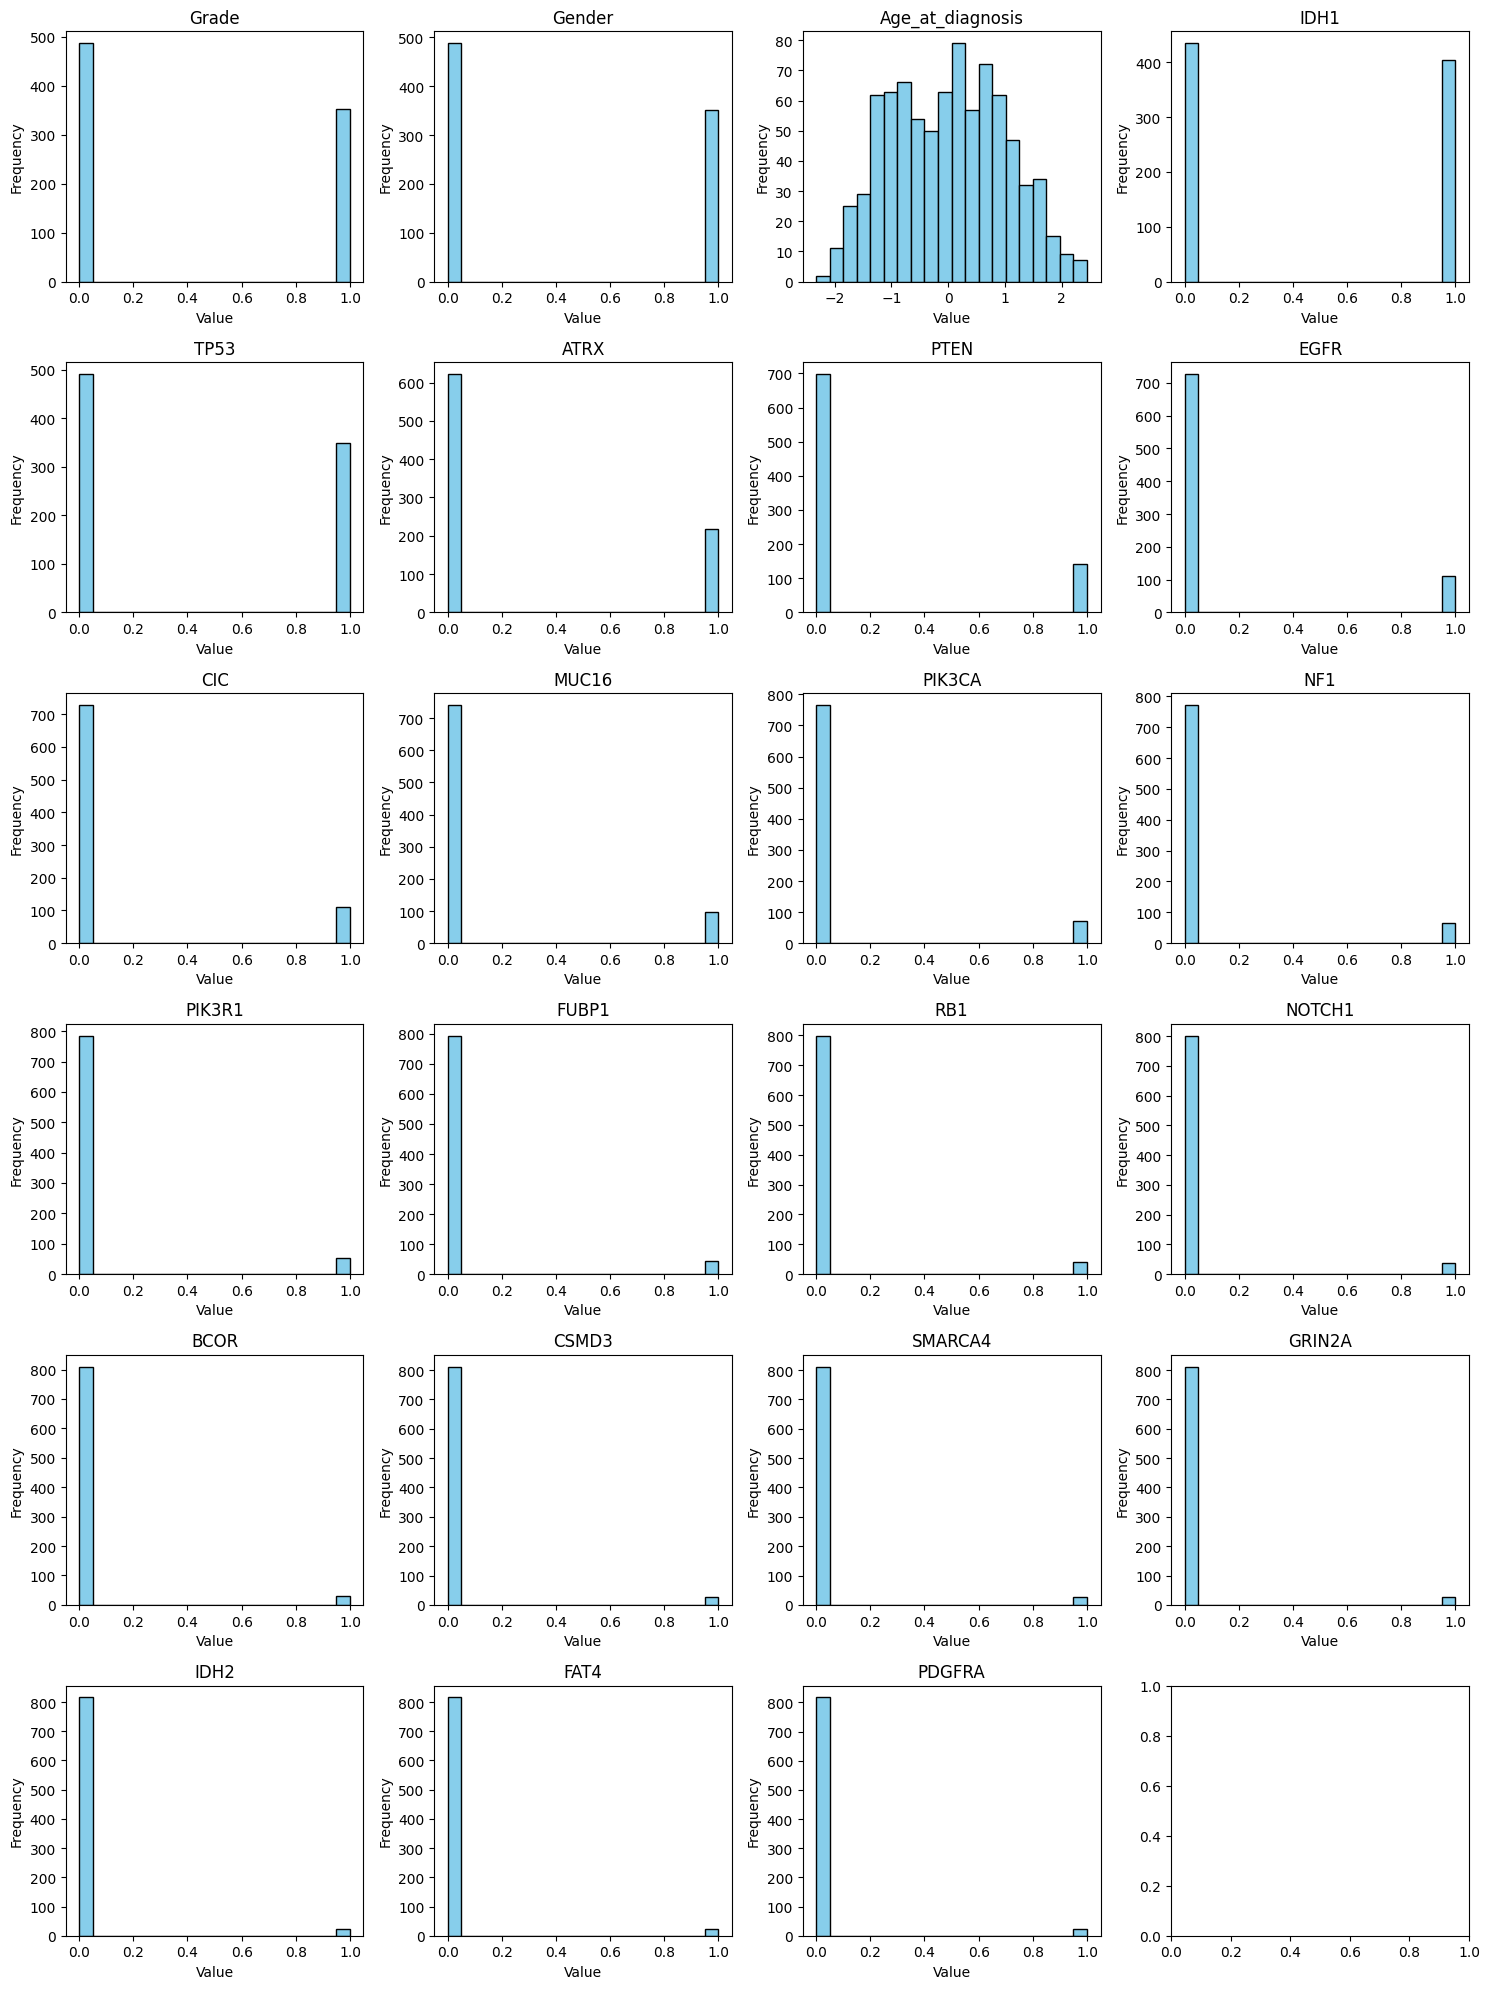

In [5]:
def plot_distribution(data):
    # Plot the distribution of data in all columns
    fig, axs = plt.subplots(nrows=6, ncols=4, figsize=(15, 20))
    axs = axs.flatten()

    # Iterate over each column and plot the distribution
    for i, column in enumerate(data.columns):
        axs[i].hist(data[column], bins=20, color='skyblue', edgecolor='black')
        axs[i].set_title(column)
        axs[i].set_xlabel('Value')
        axs[i].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

plot_distribution(gliomas)

In [6]:
gliomas.describe().T

,count,mean,std,min,25%,50%,75%,max
Grade,839.0,4.195471e-01,0.493779,0.000000,0.000000,0.000000,1.000000,1.000000
Gender,839.0,4.183552e-01,0.493583,0.000000,0.000000,0.000000,1.000000,1.000000
Age_at_diagnosis,839.0,1.016271e-16,1.000596,-2.326863,-0.820775,0.039163,0.756044,2.444061
IDH1,839.0,4.815256e-01,0.499957,0.000000,0.000000,0.000000,1.000000,1.000000
TP53,839.0,4.147795e-01,0.492978,0.000000,0.000000,0.000000,1.000000,1.000000
ATRX,839.0,2.586412e-01,0.438149,0.000000,0.000000,0.000000,1.000000,1.000000
PTEN,839.0,1.680572e-01,0.374140,0.000000,0.000000,0.000000,0.000000,1.000000
EGFR,839.0,1.334923e-01,0.340309,0.000000,0.000000,0.000000,0.000000,1.000000
CIC,839.0,1.323004e-01,0.339019,0.000000,0.000000,0.000000,0.000000,1.000000
MUC16,839.0,1.168057e-01,0.321380,0.000000,0.000000,0.000000,0.000000,1.000000


## Split original dataset

* `train_test_split` function from scikit-learn split a dataset into random train and test subsets
* Default behaviour,
  * Shuffles the data before splitting
  * Does not inherently preserve the distribution of the original dataset when splitting to train and test subsets 
  * The distribution in train and test subsets the depends on the randomness of the split
* Stratified sampling in `train_test_split` function ensures that the distribution of classes (e.g., LGG and GBM distribution) in original dataset is the same in split-datasets

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    gliomas.drop("Grade", axis=1),
    gliomas["Grade"],
    test_size=0.3,
    random_state=42,
    stratify=gliomas["Grade"],
)

In [8]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (587, 22)
X_test (252, 22)
y_train (587,)
y_test (252,)


## Train a logistic regression model

In [9]:
lr = LogisticRegression(solver='lbfgs', max_iter=100)

# Fit the model
lr.fit(X_train, y_train)

LogisticRegression()

### Logistic regression model

* Think of logistic regression as having three distinct layers that work together
  * The Raw Model (Linear Predictor)
  * The Model Output (Probability)
  * The Decision Boundary


#### The Raw Model (Linear Predictor)

$z = β0 + β1x1 + β2x2 + β3*x3$

Where:
* $z$ is the raw model output
  * Unbounded score that could be any real number from -∞ to +∞
* $β0$ is the intercept or bias term
* $β1, β2, β3$ are the coefficients or weights associated with features $x1, x2, x3$ respectively
* $x1, x2, x3$ are the values of the features

Text(0.5, 1.0, 'Distribution of Raw model output')

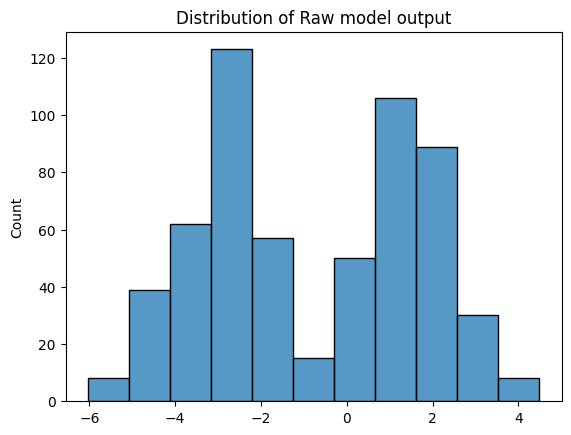

In [10]:
sns.histplot(lr.decision_function(X_train))
plt.title('Distribution of Raw model output')

#### The Model Output (Probability)

* Raw score then gets transformed through the sigmoid function
* Sigmoid function: Converts our unbounded raw score into a probability between 0 and 1

In [11]:
probabilities = lr.predict_proba(X_test)
print("Probabilities for first 5 test samples:")
print(probabilities[:5])
print("\nNote: Column 0 = P(class=0), Column 1 = P(class=1)")


Probabilities for first 5 test samples:
[[0.2877258  0.7122742 ]
 [0.30536037 0.69463963]
 [0.86905511 0.13094489]
 [0.24988542 0.75011458]
 [0.91616818 0.08383182]]

Note: Column 0 = P(class=0), Column 1 = P(class=1)


Text(0.5, 1.0, 'Distribution of Model Output (Probabilities)')

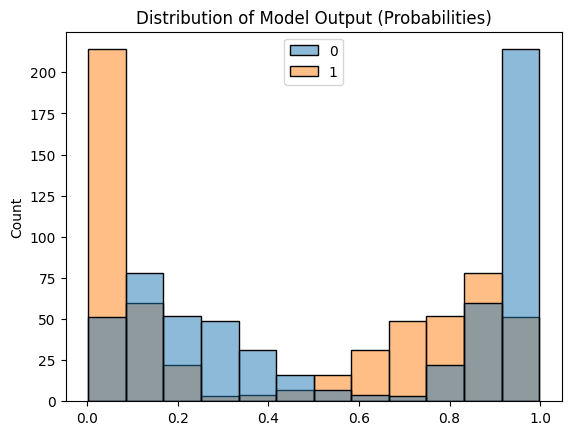

In [12]:
sns.histplot(lr.predict_proba(X_train))
plt.title('Distribution of Model Output (Probabilities)')

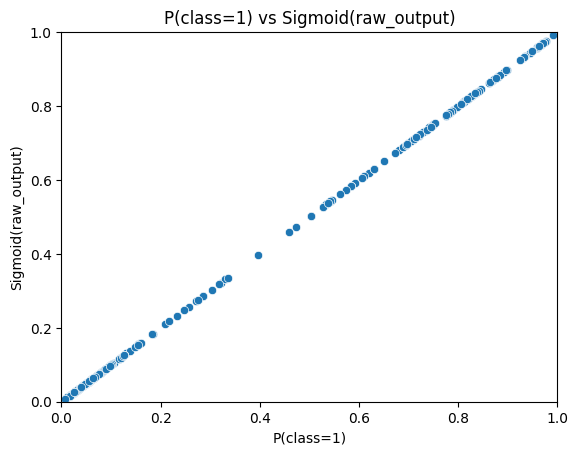

In [13]:
# Verify the relationship: probability = sigmoid(raw_output)

raw_output = lr.decision_function(X_test)  # All test samples

## `LogisticRegression` model is parameterized to directly model the probability of class 1, so sigmoid(raw_output) gives P(class=1), not P(class=0)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

sns.scatterplot(y=sigmoid(raw_output), x=probabilities[:, 1])
plt.xlabel('P(class=1)')
plt.ylabel('Sigmoid(raw_output)')
plt.title('P(class=1) vs Sigmoid(raw_output)')
#plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()


#### The Decision Boundary

* Decision Boundary helps make actual yes/no predictions
* Done by setting a threshold on our probability outputs
* Default threshold
  * Raw output = 0 (linear predictor equals zero)
  * Probability = 0.5 (after sigmoid transformation)
* Threshold creates what we call the decision boundary that separates classes
  * If we have two features decision boundary is a line or 
  * in higher dimensions, decision boundary is a hyperplane

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Train on 2D data
lr_2d = LogisticRegression(solver='lbfgs', max_iter=100)
lr_2d.fit(X_train_2d, y_train)

predicted_classes_2d = lr_2d.predict(X_test_2d)
Z_prob = lr_2d.predict_proba(X_test_2d)[:, 1]

print(Z_prob[:10], X_test_2d[:10,:], predicted_classes_2d[:10])

[0.60805337 0.50597094 0.47229217 0.6781526  0.0568336  0.81048772
 0.75363624 0.04432821 0.80684454 0.058396  ] [[ 0.74515325 -0.18734103]
 [ 0.56837262 -0.30335269]
 [-0.33389392  0.81342899]
 [ 0.91672279 -0.15814884]
 [-1.81564144  0.51476147]
 [ 0.80692301  0.60144003]
 [ 1.16169866 -0.1718711 ]
 [-1.91648207  0.42722421]
 [ 1.28223986 -0.06832215]
 [-1.47115881  0.06883081]] [1 1 0 1 0 1 1 0 1 0]


In [15]:
pred_2ds = pd.DataFrame(X_test_2d, columns=['PC1', 'PC2'])
pred_2ds['Predicted_class'] = predicted_classes_2d
pred_2ds['Probability'] = Z_prob
pred_2ds['True'] = y_test.values
pred_2ds.head()

,PC1,PC2,Predicted_class,Probability,True
0,0.745153,-0.187341,1,0.608053,1
1,0.568373,-0.303353,1,0.505971,1
2,-0.333894,0.813429,0,0.472292,0
3,0.916723,-0.158149,1,0.678153,0
4,-1.815641,0.514761,0,0.056834,0


In [16]:
pred_2ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PC1              252 non-null    float64
 1   PC2              252 non-null    float64
 2   Predicted_class  252 non-null    int64  
 3   Probability      252 non-null    float64
 4   True             252 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 10.0 KB


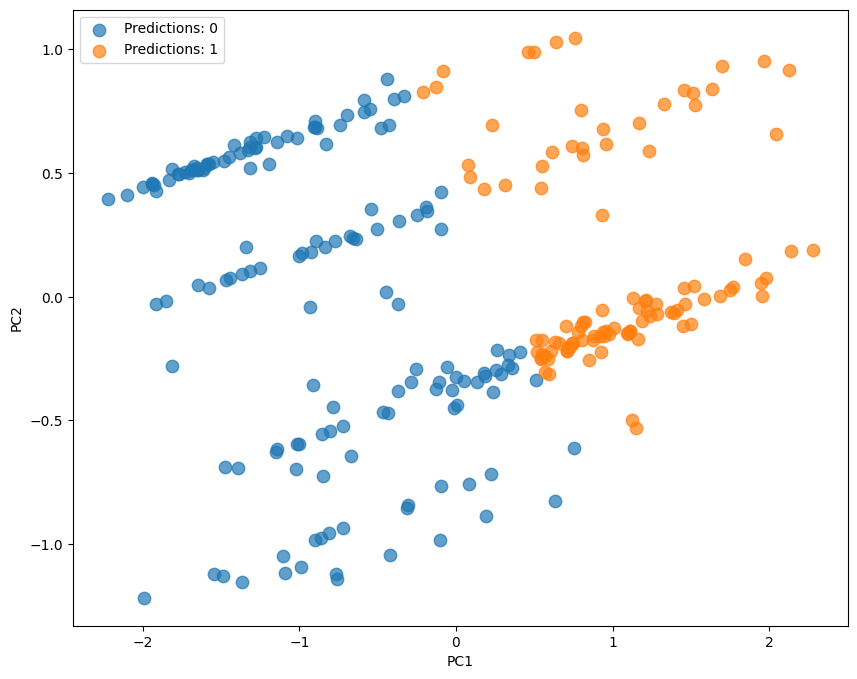

In [17]:
plt.figure(figsize=(10, 8))

for pred_class in lr_2d.classes_:
    cluster_points = pred_2ds[pred_2ds['Predicted_class'] == pred_class]
    plt.scatter(
        cluster_points['PC1'], 
        cluster_points['PC2'],
        label=f'Predictions: {pred_class}',
        alpha=0.7,
        s=80
    )

    # for i, row in cluster_points.iterrows():
    #     plt.text(row['PC1'], row['PC2'], str(round(row['Probability'], 2)), fontsize=8, alpha=0.7)
    
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

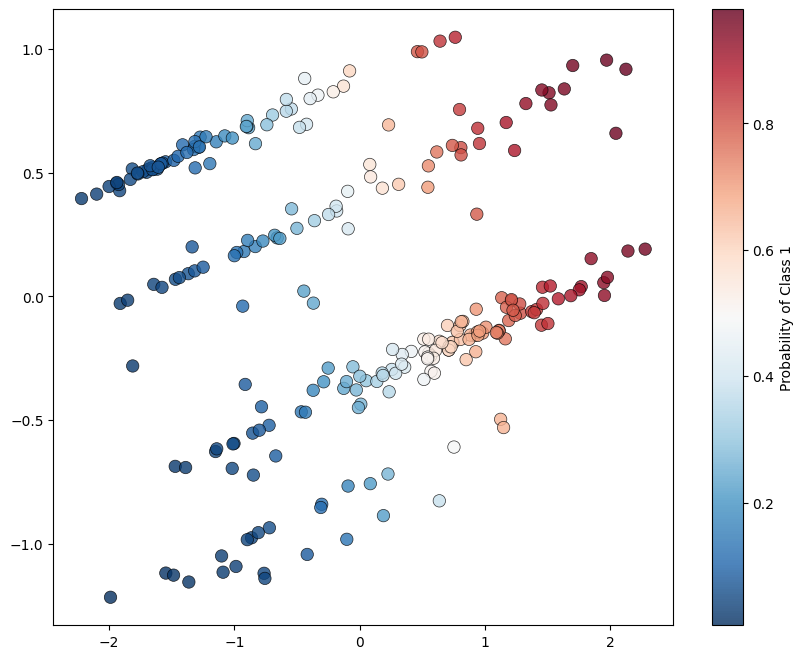

In [18]:
plt.figure(figsize=(10, 8))

# Plot all points with color based on probability
scatter = plt.scatter(
    pred_2ds['PC1'], 
    pred_2ds['PC2'],
    c=pred_2ds['Probability'],  # Color based on probability
    cmap='RdBu_r',  # Red for high probability, Blue for low
    s=80,
    alpha=0.8,
    edgecolors='black',
    linewidth=0.5
)

# Add colorbar
plt.colorbar(scatter, label='Probability of Class 1')



## Predict the Glioma type of the new dataset

In [19]:
# lr = LogisticRegression(solver='lbfgs', max_iter=100)

# # Fit the model
# lr.fit(X_train, y_train)
predicted_classes = lr.predict(X_test)
print("Predicted classes for first 10 samples:", predicted_classes[:10])


Predicted classes for first 10 samples: [1 1 0 1 0 1 1 0 1 0]


## Examine and understand the importance of features in predicting glioma type

### Coefficients of the model

* Magnitude of the coefficients indicates the relative importance of each feature on predicting positive class (in this case 1 - GBM)
* Larger coefficients imply a stronger influence on the predicted probability
* Interpretation of coefficients assumes that the features are independent of each other

In [20]:
feature_list = gliomas.columns[1:]
print("Number of Features", len(feature_list))
print("Features", feature_list)

Number of Features 22
Features Index(['Gender', 'Age_at_diagnosis', 'IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR',
       'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1',
       'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA'],
      dtype='object')


In [21]:
# Create a DataFrame of the coefficients an their corresponding features
coefficients = pd.DataFrame(lr.coef_.T, index=feature_list, columns=['Coefficient'])
coefficients.sort_values(by='Coefficient', ascending=False)

,Coefficient
GRIN2A,1.055559
PIK3R1,0.947821
TP53,0.942698
PTEN,0.796895
Age_at_diagnosis,0.681210
MUC16,0.604221
PDGFRA,0.445061
BCOR,0.353871
CSMD3,0.273685
RB1,0.156207


<BarContainer object of 22 artists>

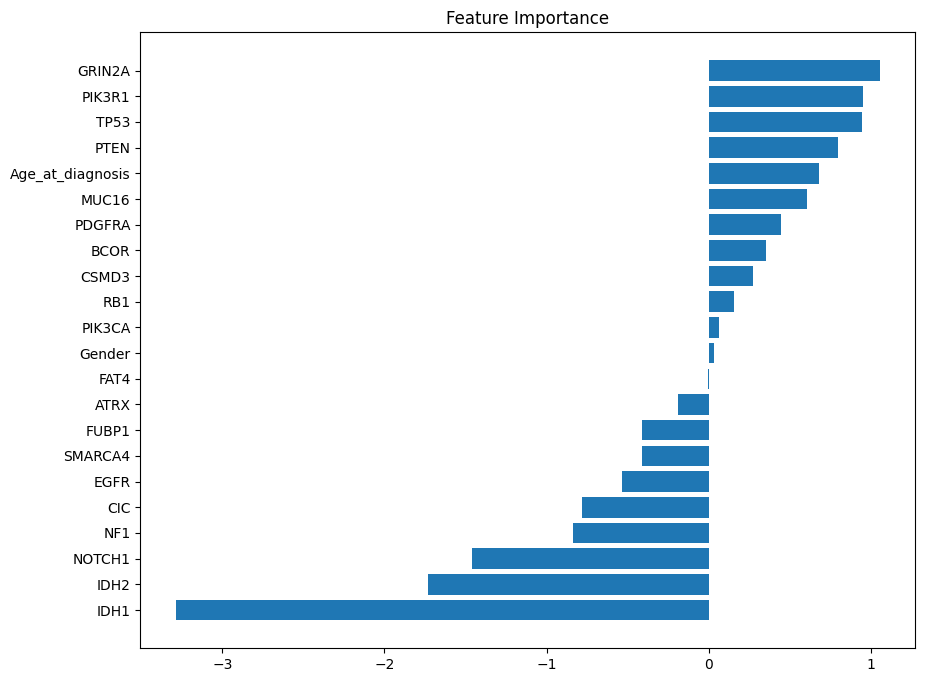

In [22]:
plt.figure(figsize=(10, 8))
plt.title('Feature Importance')

plt.barh('index', 'Coefficient', align='center', data=coefficients.sort_values(by='Coefficient', ascending=True).reset_index())

## Evaluation of the model performance

* Confusion matrix
* Performance evaluation matrices

### Confusion matrix

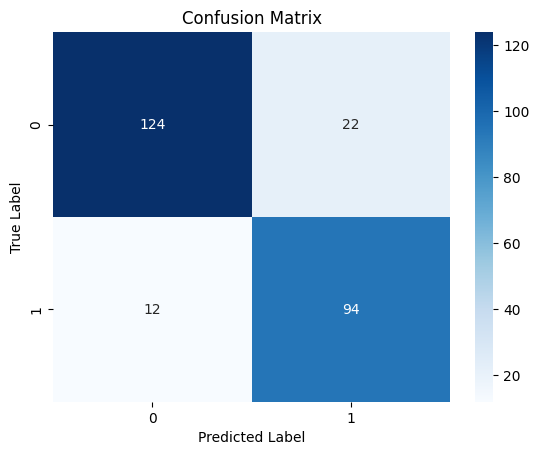

In [23]:
# Compute confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Performance evaluation matrices

#### Precision (Positive Predictive Value)

* Precision focuses on the correctness of the positive predictions made by the model
* Signifies the model's ability to avoid misclassifying negative cases as positive
* Higher precision indicates fewer misclassifications (i.e., Higher precision means a smaller proportion of negative cases incorrectly identified as positive)

**Precision is percentage of correctly predicted GBM patients out of all predicted GBM patients**

In [24]:
print("Confusion matrix:\n", cm)
TP = cm[1, 1]
FP = cm[0, 1]

print("True positive count (correct GBM predictions):", TP)
print("False positive count (incorrect GBM predictions):", FP)

precision = TP / (TP + FP)

print("Precision of predicting positive class - GBM:", np.round(precision, 3))

Confusion matrix:
 [[124  22]
 [ 12  94]]
True positive count (correct GBM predictions): 94
False positive count (incorrect GBM predictions): 22
Precision of predicting positive class - GBM: 0.81


In [25]:
# Compute precision score
lr_precision = precision_score(y_test, predicted_classes, average=None)
print(pd.DataFrame({"category": lr.classes_, "precision": np.round(lr_precision, 3)}))


   category  precision
0         0      0.912
1         1      0.810


#### Recall | Sensitivity | True positive rate

This is the **percentage of actual positive cases that the test correctly identifies as positive**. In other words, it measures how good the test is at catching what it's supposed to catch.

**Fraction of correctly predicted GBM patients out of actual GBM patients**

* Recall
  * Measures the ability of correctly predicting positive cases from the actual positive cases
  * A higher true positive rate signifies a more effective model in correctly identifying positive cases
  * Recall = Fraction of correctly predicted positive observations to the all observations in actual class



In [26]:
print("Confusion matrix:\n", cm)
TP = cm[1, 1]
FN = cm[1, 0]
TPR = TP / (TP + FN)
print("True positive count (correct GBM predictions):", TP)
print("False negative count (missed GBM predictions or GBMs predicted as LGGs):", FN)
print("True Positive Rate", np.round(TPR, 3))

Confusion matrix:
 [[124  22]
 [ 12  94]]
True positive count (correct GBM predictions): 94
False negative count (missed GBM predictions or GBMs predicted as LGGs): 12
True Positive Rate 0.887


In [27]:
lr_recall = recall_score(y_test, predicted_classes, average=None)
print(pd.DataFrame({"category": lr.classes_, "recall": np.round(lr_recall, 3)}))


   category  recall
0         0   0.849
1         1   0.887


## Probability of model predictions

* Model calculates the probability of an observation belonging to a class (i.e., probability of predicting an observation as positive class)
* Default probability used for the classification is 0.5

### Probability threshold

* When the threshold is set low, more items are classified as positive, potentially increasing both the number of true positives (TPR) and the number of false positives (FPR)
* As the threshold increases, the classifier becomes more conservative, usually increasing the FPR at a slower rate than the TPR.

Text(0, 0.5, 'Predicted Probability of class 1')

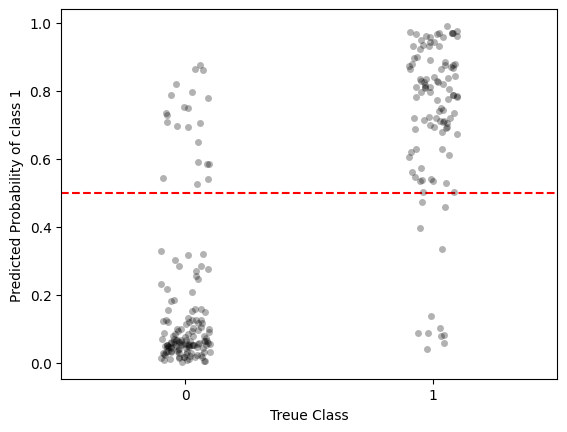

In [28]:
test_probabilities = lr.predict_proba(X_test)
# Create a DataFrame with observed and predicted values
lr_res = pd.DataFrame({"obs": y_test, "pred_1": test_probabilities[:, 1]})

# plt.figure(figsize=(8, 6)) # not necessary
#sns.boxplot(x="obs", y="pred_1", showfliers=False, data=lr_res, hue="obs")
sns.stripplot(x="obs", y="pred_1", data=lr_res, color="black", alpha=0.3)
plt.axhline(y=0.5, color="red", linestyle="--")

plt.xlabel("Treue Class")
plt.ylabel("Predicted Probability of class 1")


#### Receiver Operating Characteristic

An ROC curve is a graph that shows how good a classification model is at distinguishing between two classes.

* The ROC curve plots the TPR (recall) on the y-axis against the FPR on the x-axis for all possible threshold values.
* False Positive Rate (FPR)
  * This is the percentage of actual negative cases that your test incorrectly identifies as positive. It's measuring how often your test gives false alarms.
  * FPR captures the rate of the model producing a positive prediction when the actual class is negative
  * FPR = proportion of cases that are incorrectly predicted as positive out of negatives `FPR = FP / (TN + FP)`

* An ideal classifier would have a point in the upper left corner of the plot, corresponding to a TPR of 1 (perfect recall) and an FPR of 0 (no false alarms).
* A classifier with no discriminative power would have points along the diagonal line from the bottom left to the top right, known as the line of no discrimination. Here, the TPR and FPR are equal, which is similar to random guessing

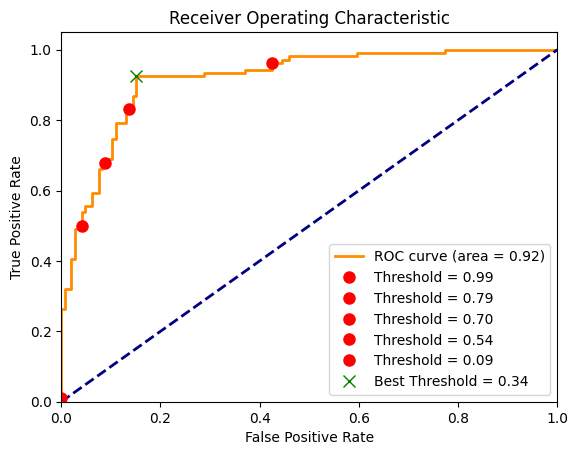

In [29]:
# predicted probabilities (test_probabilities)
y_pred_prob = test_probabilities[:,1]#lr.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Define example thresholds (adjust as needed)
thresholds_to_show = []
for i in range(1, len(thresholds), 10):
    thresholds_to_show.append(thresholds[i]) # Example thresholds


# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')

# Loop through thresholds and mark points on ROC curve
for threshold in thresholds_to_show:
  # Find the index of the threshold in the thresholds array
  thresh_idx = np.where(thresholds == threshold)[0]
  # Extract corresponding FPR and TPR values
  fpr_at_thresh = fpr[thresh_idx]
  tpr_at_thresh = tpr[thresh_idx]
  # Plot a marker at the point on the ROC curve
  plt.plot(fpr_at_thresh, tpr_at_thresh, 'o', markersize=8, color='red', 
           label=f'Threshold = {threshold:.2f}')

j_statistic = tpr - fpr

# Find the index of the threshold with the maximum J statistic
best_thresh_idx = np.argmax(j_statistic)

# Extract the best threshold, TPR, and FPR values
best_threshold = thresholds[best_thresh_idx]
best_tpr = tpr[best_thresh_idx]
best_fpr = fpr[best_thresh_idx]

thresholds_to_show.append(thresholds[best_thresh_idx])
plt.plot(best_fpr, best_tpr, 'x', markersize=8, color='green', label=f'Best Threshold = {best_threshold:.2f}')

plt.legend(loc="lower right")
plt.show()


In [ ]:
## Apply custom threshold and make predictions

(y_pred_prob >= best_threshold).astype(int)

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0])